In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model, Model
from keras.datasets import mnist

In [2]:
# Cargar el modelo entrenado
model = load_model('MNIST_Conv2D.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 10)                4

x_test.shape =  (10000, 28, 28)

x_test.shape =  (10000, 28, 28, 1)

test_image.shape =  (28, 28, 1)


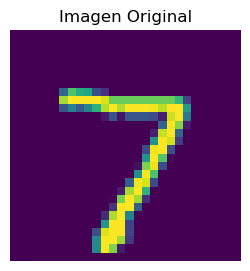

In [3]:
# Cargar datos de prueba
(_, _), (x_test, _) = mnist.load_data()
x_test = x_test.astype('float32') / 255.0
print("x_test.shape = ", x_test.shape)
x_test = np.expand_dims(x_test, axis=-1)
print("\nx_test.shape = ", x_test.shape)

# Seleccionar una imagen de prueba
test_image = x_test[0]
print("\ntest_image.shape = ", test_image.shape)

# Visualizar la imagen original
plt.figure(figsize=(3, 3))
plt.imshow(test_image.squeeze(), cmap='viridis')  #'gray'
plt.title('Imagen Original')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 475ms/step

Salida de la primera capa convolucional


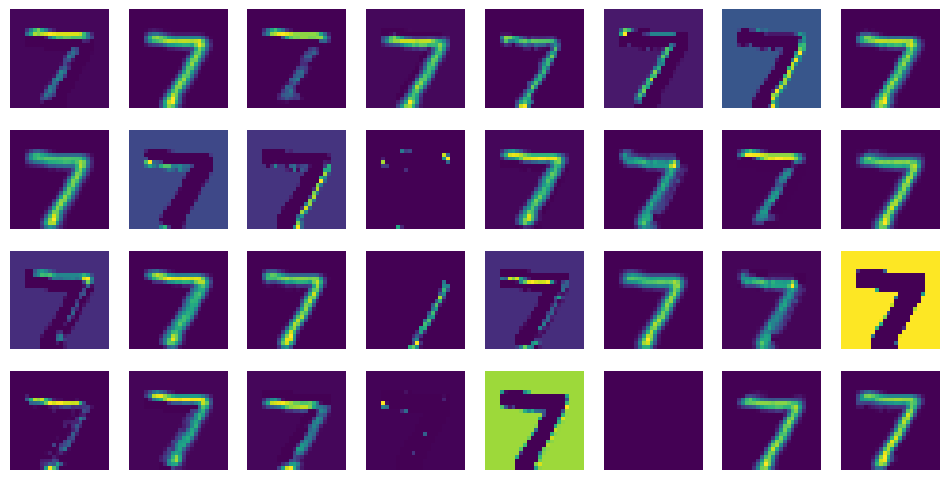



Salida de la segunda capa convolucional


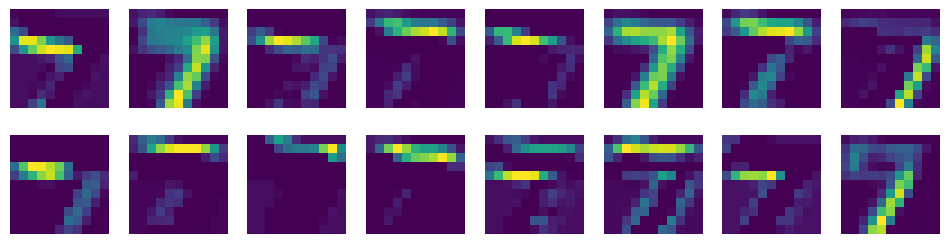

In [4]:
# Crear un modelo que devuelva las salidas de las capas convolucionales
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Obtener las salidas de las capas convolucionales
activations = activation_model.predict(np.expand_dims(test_image, axis=0))

# Función para graficar las salidas de una capa
def plot_layer_activations(layer_activations, num_filters):
    num_cols = 8
    num_rows = num_filters // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 1.5*num_rows))
    for i in range(num_filters):
        ax = axes[i // num_cols, i % num_cols]
        ax.matshow(layer_activations[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()

# Graficar las salidas de la primera capa convolucional
print("\nSalida de la primera capa convolucional")
plot_layer_activations(activations[0], 32)

# Graficar las salidas de la segunda capa convolucional
print("\n\nSalida de la segunda capa convolucional")
plot_layer_activations(activations[1], 16)


Filtros de la primera capa convolucional
Dimensión de la primera capa convolucional:  (3, 3, 1, 32)


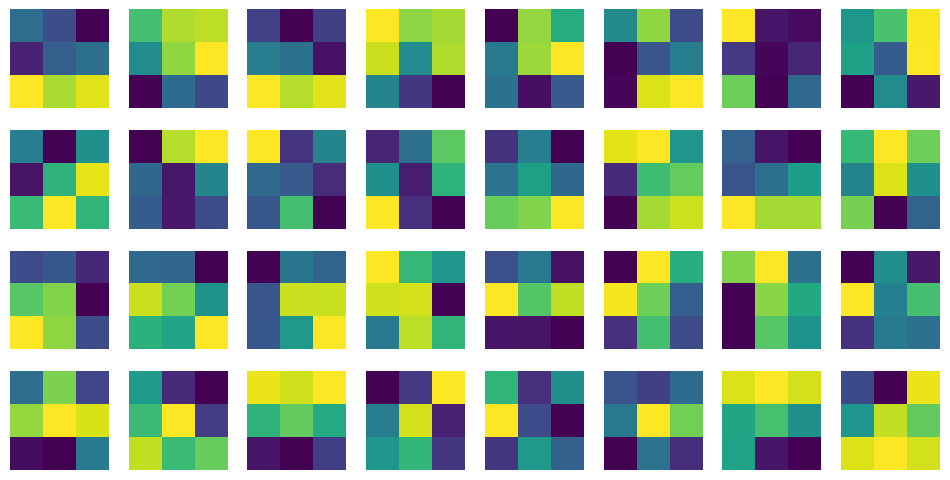


Filtros de la segunda capa convolucional
Dimensión de la segunda capa convolucional:  (3, 3, 32, 16)


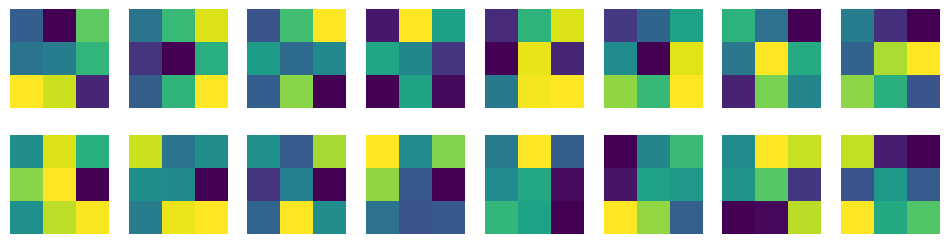

Primer canal del 1er. filtro:
[[-0.03842552 -0.09475689  0.04640268]
 [-0.02241265 -0.0154446   0.02829031]
 [ 0.09262016  0.07854377 -0.07499257]]
\Primer canal del 2do. filtro:
[[-0.05796243  0.02099727  0.09400427]
 [-0.12049396 -0.16249388  0.00748528]
 [-0.08288335  0.01507143  0.10872478]]


In [5]:
# Graficar los filtros de la primera capa convolucional
first_conv_layer = model.get_layer(name='conv2d')
filters, biases = first_conv_layer.get_weights()

print("\nFiltros de la primera capa convolucional")
print("Dimensión de la primera capa convolucional: ", filters.shape)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(32):
    ax = axes[i // 8, i % 8]
    ax.matshow(filters[:, :, 0, i], cmap='viridis')
    ax.axis('off')
plt.show()


# Graficar los filtros de la segunda capa convolucional
second_conv_layer = model.get_layer(name='conv2d_1')
filters, biases = second_conv_layer.get_weights()

print("\nFiltros de la segunda capa convolucional")
print("Dimensión de la segunda capa convolucional: ", filters.shape)

fig, axes = plt.subplots(2, 8, figsize=(12, 3))
for i in range(16):
    ax = axes[i // 8, i % 8]
    ax.matshow(filters[:, :, 0, i], cmap='viridis')
    ax.axis('off')
plt.show()

print("Primer canal del 1er. filtro:")
print(filters[:, :, 0, 0])

print("\Primer canal del 2do. filtro:")
print(filters[:, :, 0, 1])

